**Source:**
- Book: Machine Learning with Pytorch, Skicit-learn - Chapter 10
- Book: Hands-on Machine Learning with Scikit-Learn, Keras, Tensorflow - Chapter 9

In [10]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [11]:
X, y = make_blobs(n_samples = 150,
                  n_features = 2,
                  centers = 3,
                  cluster_std = 0.5,
                  shuffle = True,
                  random_state = 0)

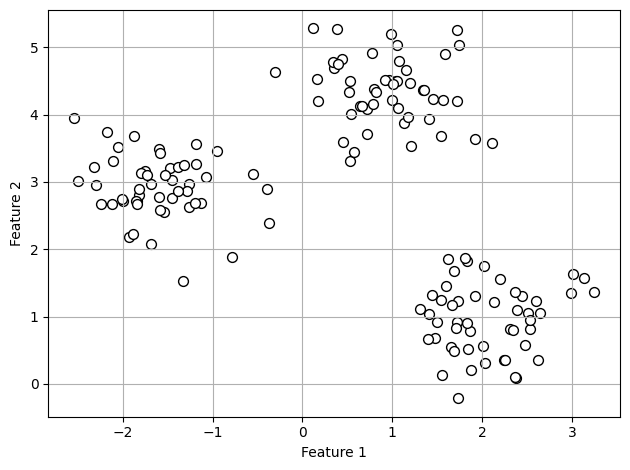

In [12]:
plt.scatter(X[:, 0],
            X[:, 1],
            c='white',
            marker='o',
            edgecolor='black',
            s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.tight_layout()
plt.show()

Our goal is to group the examples based on their feature similarities, which can be achieved using the k-means algorithm, as summarized by the following for steps:
1. Randomly pick k centroids from the examples as initial cluster centers
2. Assign each example to the nearest centroid, 𝜇(𝑗), j belong to {1, … , 𝑘𝑘}
3. Move the centroids to the center of the examples that were assigned to it
4. Repead steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or mamimum number of iterations is reached

We use squared Euclidean distance to define similarity between objects


In [13]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3,
            init = 'random',
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state = 0)
y_km = km.fit_predict(X)

We set the number of desired clusters to 3; having to specify to number of clusters a prori is one of the limitations of k-means

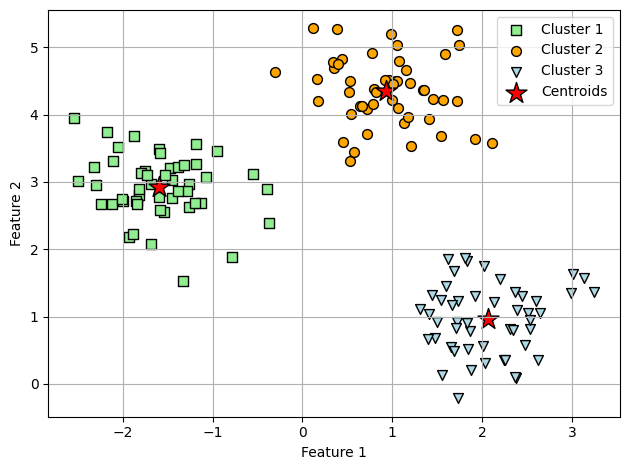

In [14]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()

#K-Means++

#Find the optimal number of clusters

As we can see from K-Means and K-Means ++, one of the main challenges in unsupervised learning is that we do not know the definitive answer.

To quantify the quality of clustering, we need to use intrinsic metrics - such as the within-cluster SSE (distortion) - to compare the performance of different k-means clustering models

In [15]:
print(f'Distortion: {km.inertia_:.2f}')

Distortion: 72.48


**Elbow method**

We can use a graphical tool, elbow method, to estimate the optimal number of clusters, k, for a given task.

If k increases, the distortion will decrease. This is because the examples will be closer to the centroids they are assigned to.

With elbow method, the main purpose is to identify the value of k where distortion begins to increase most rapidly, which will become clearer if we plot the distortion for different values of k

In [16]:
distortions = []
for i in range(1, 11):
  km = KMeans(n_clusters = i,
              init = 'k-means++',
              n_init = 10,
              max_iter = 300,
              random_state = 0)
  km.fit(X)
  distortions.append(km.inertia_)

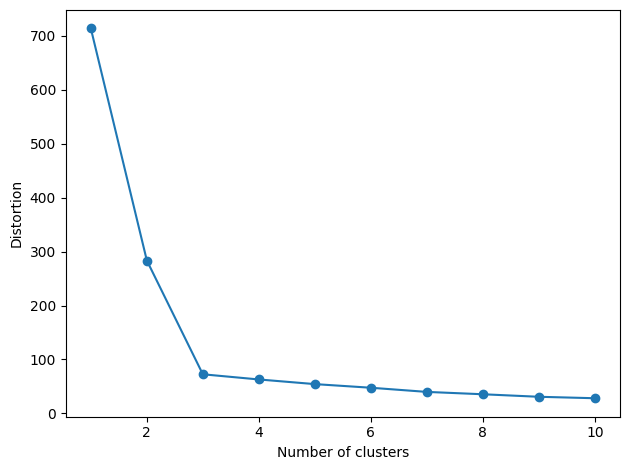

In [17]:
plt.plot(range(1,11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

**Silhouette plots**

In [19]:
km = KMeans(n_clusters = 3,
            init = 'k-means++',
            n_init = 10,
            max_iter = 300,
            tol= 1e-04,
            random_state = 0)
y_km = km.fit_predict(X)

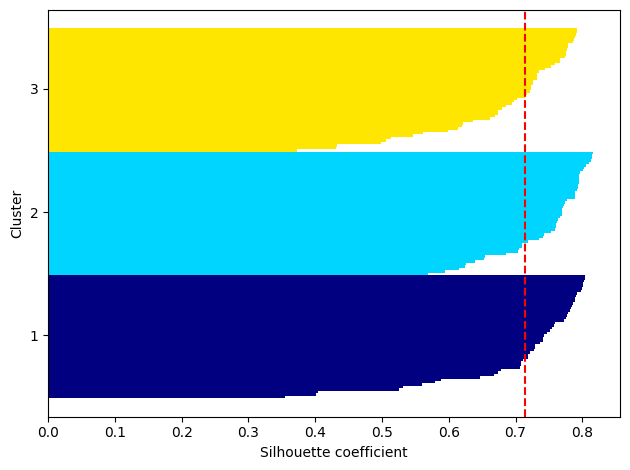

In [20]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(
    X, y_km, metric = 'euclidean'
)
y_ax_lower, y_ax_upper = 0,0

yticks = []
for i, c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km == c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height = 1.0,
            edgecolor = 'none',
            color = color)
  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()
